In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [3]:
# Set aesthetic parameters for visualizations
plt.style.use('ggplot')
sns.set_palette("colorblind")

In [4]:
# Load the dataset
file_path = '../data/raw/customer_churn_dataset-training-master.csv'
df = pd.read_csv(file_path)

In [5]:
# Display basic information
print(f"Dataset Shape: {df.shape}")
print("\nFirst 5 rows:")
print(df.head())

Dataset Shape: (440833, 12)

First 5 rows:
   CustomerID   Age  Gender  Tenure  Usage Frequency  Support Calls  \
0         2.0  30.0  Female    39.0             14.0            5.0   
1         3.0  65.0  Female    49.0              1.0           10.0   
2         4.0  55.0  Female    14.0              4.0            6.0   
3         5.0  58.0    Male    38.0             21.0            7.0   
4         6.0  23.0    Male    32.0             20.0            5.0   

   Payment Delay Subscription Type Contract Length  Total Spend  \
0           18.0          Standard          Annual        932.0   
1            8.0             Basic         Monthly        557.0   
2           18.0             Basic       Quarterly        185.0   
3            7.0          Standard         Monthly        396.0   
4            8.0             Basic         Monthly        617.0   

   Last Interaction  Churn  
0              17.0    1.0  
1               6.0    1.0  
2               3.0    1.0  
3          

In [6]:
# Check for missing values
print("\nMissing Values:")
print(df.isnull().sum())


Missing Values:
CustomerID           1
Age                  1
Gender               1
Tenure               1
Usage Frequency      1
Support Calls        1
Payment Delay        1
Subscription Type    1
Contract Length      1
Total Spend          1
Last Interaction     1
Churn                1
dtype: int64


In [7]:
# Check for duplicates
duplicate_count = df.duplicated().sum()
print(f"\nNumber of duplicate rows: {duplicate_count}")


Number of duplicate rows: 0


In [8]:
# Statistical summary
print("\nStatistical Summary:")
print(df.describe(include='all').T)


Statistical Summary:
                      count unique       top    freq           mean  \
CustomerID         440832.0    NaN       NaN     NaN  225398.667955   
Age                440832.0    NaN       NaN     NaN      39.373153   
Gender               440832      2      Male  250252            NaN   
Tenure             440832.0    NaN       NaN     NaN      31.256336   
Usage Frequency    440832.0    NaN       NaN     NaN      15.807494   
Support Calls      440832.0    NaN       NaN     NaN       3.604437   
Payment Delay      440832.0    NaN       NaN     NaN      12.965722   
Subscription Type    440832      3  Standard  149128            NaN   
Contract Length      440832      3    Annual  177198            NaN   
Total Spend        440832.0    NaN       NaN     NaN     631.616223   
Last Interaction   440832.0    NaN       NaN     NaN      14.480868   
Churn              440832.0    NaN       NaN     NaN       0.567107   

                            std    min        25%     

In [9]:
# Analyze categorical features
categorical_features = df.select_dtypes(include=['object']).columns
print("\nCategorical Features:")
for feature in categorical_features:
    print(f"\n{feature} value counts:")
    print(df[feature].value_counts())


Categorical Features:

Gender value counts:
Gender
Male      250252
Female    190580
Name: count, dtype: int64

Subscription Type value counts:
Subscription Type
Standard    149128
Premium     148678
Basic       143026
Name: count, dtype: int64

Contract Length value counts:
Contract Length
Annual       177198
Quarterly    176530
Monthly       87104
Name: count, dtype: int64


In [10]:
# Analyze numerical features
numerical_features = df.select_dtypes(include=['float64', 'int64']).columns
numerical_features = [col for col in numerical_features if col != 'CustomerID']  # Excluding ID


In [11]:
# Churn distribution (target variable)
print("\nChurn Distribution:")
churn_count = df['Churn'].value_counts()
print(churn_count)
print(f"Churn Rate: {churn_count[1] / len(df) * 100:.2f}%")


Churn Distribution:
Churn
1.0    249999
0.0    190833
Name: count, dtype: int64
Churn Rate: 56.71%


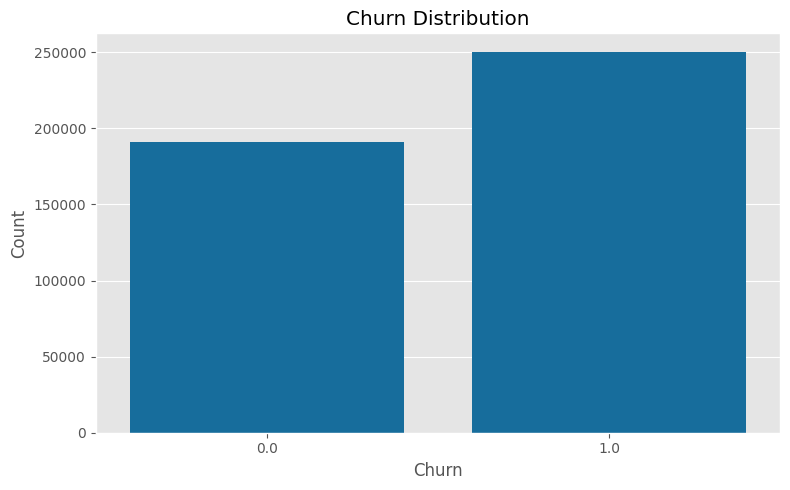

In [21]:
# Visualize churn distribution
plt.figure(figsize=(8, 5))
sns.countplot(x='Churn', data=df)
plt.title('Churn Distribution')
plt.ylabel('Count')
plt.tight_layout()
plt.savefig('../notebooks/churn_distribution.png')
plt.show()

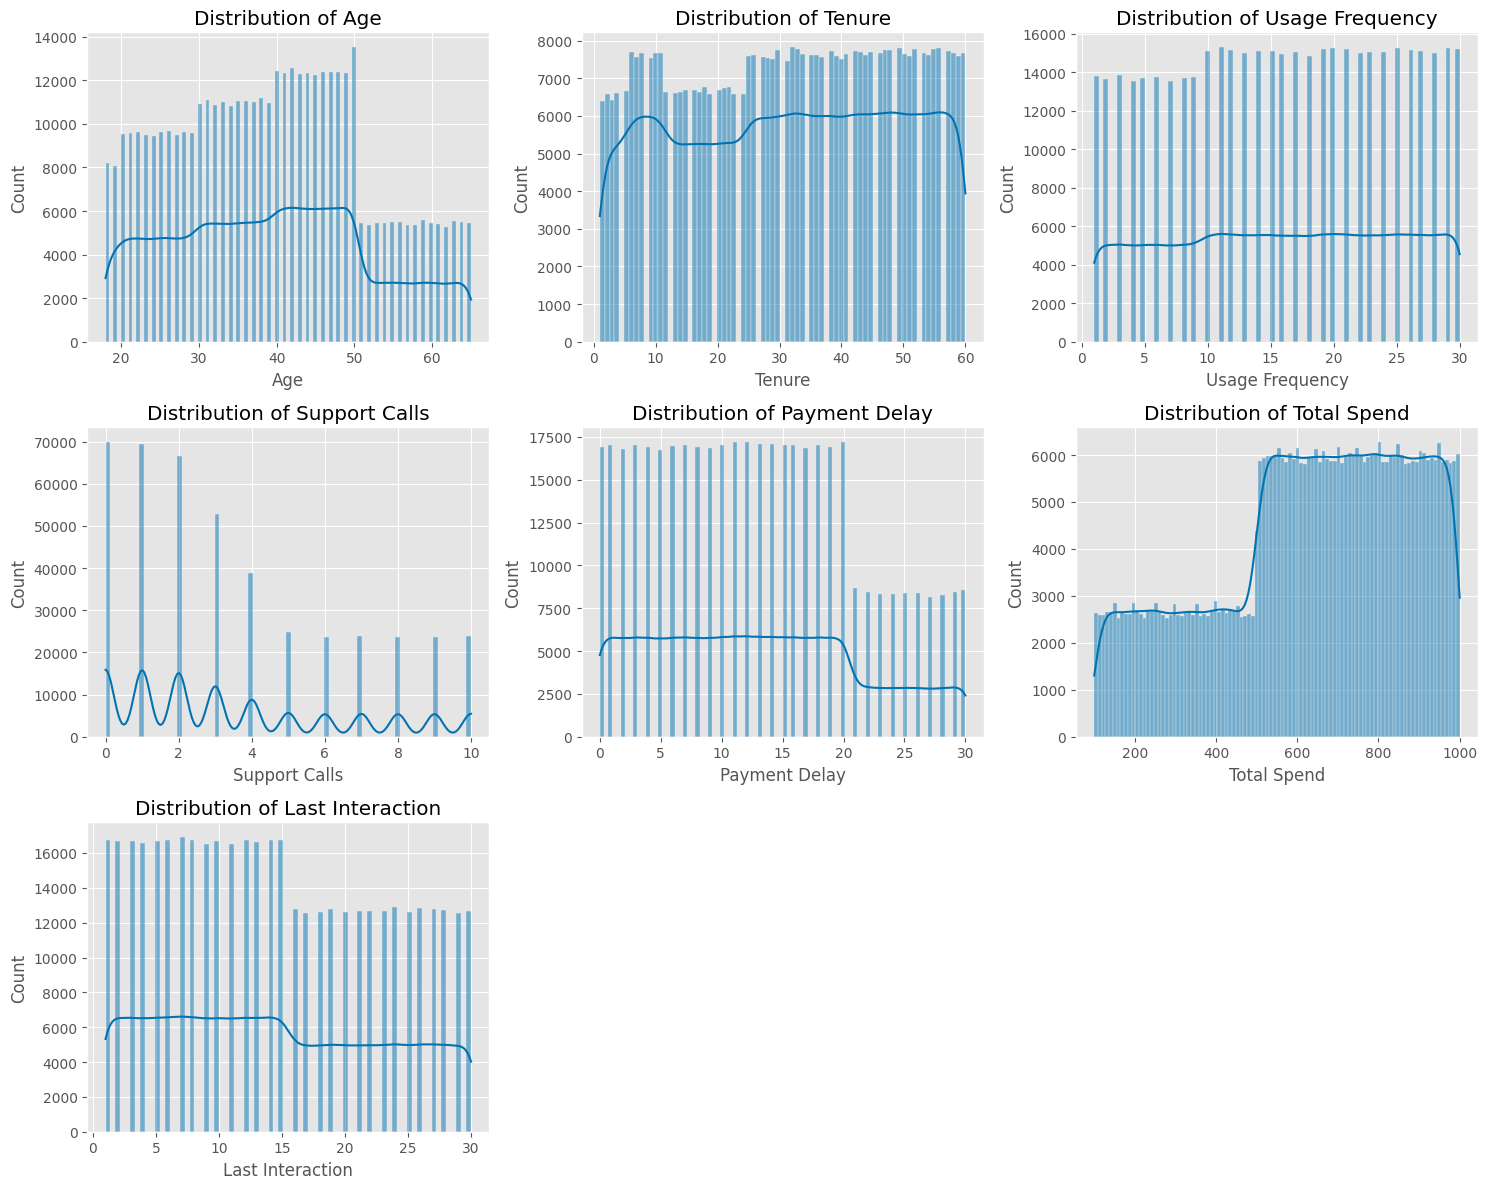

In [22]:
# Visualize numerical feature distributions
plt.figure(figsize=(15, 12))
for i, feature in enumerate(numerical_features):
    if feature != 'Churn' and feature != 'CustomerID':  # Exclude target and ID
        plt.subplot(3, 3, i+1)
        sns.histplot(df[feature], kde=True)
        plt.title(f'Distribution of {feature}')
plt.tight_layout()
plt.savefig('../notebooks/numerical_distributions.png')
plt.show()

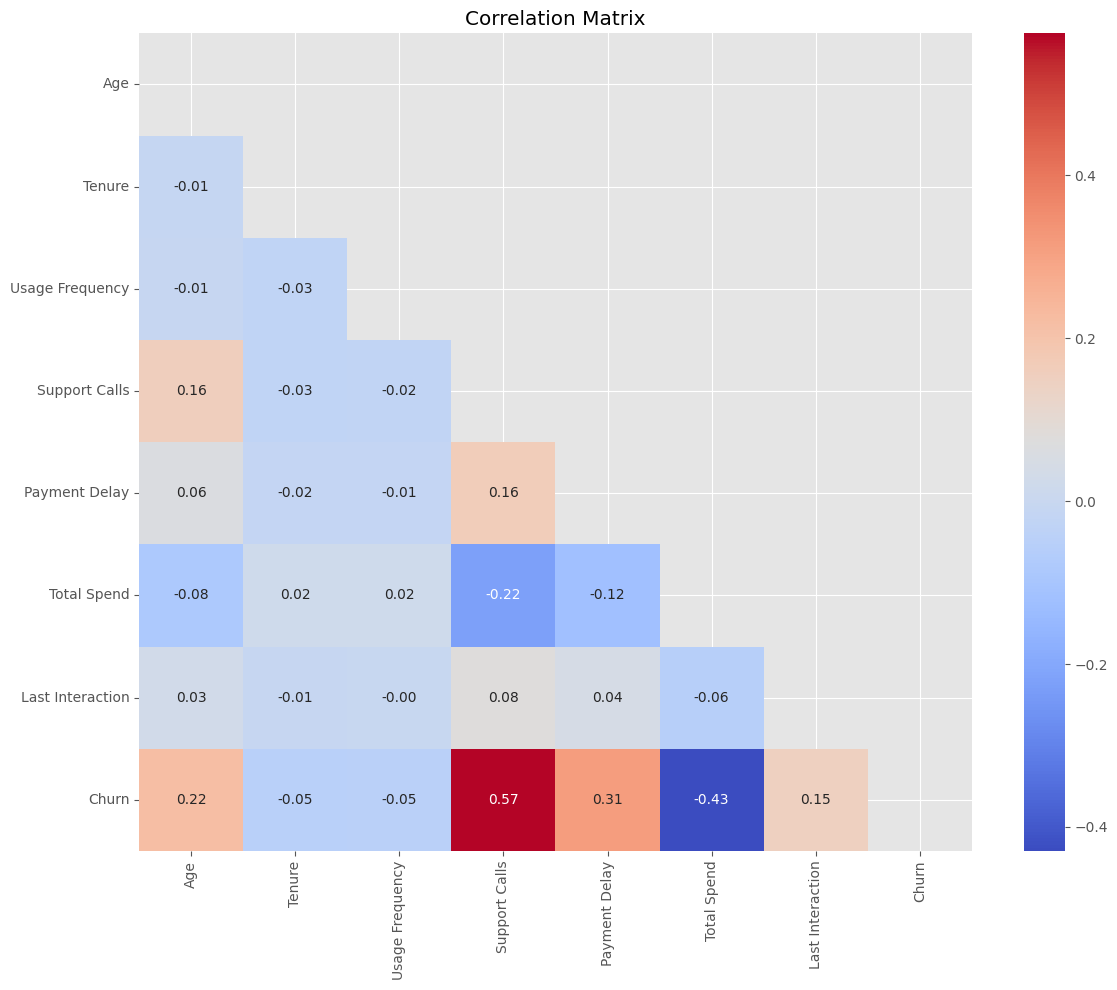

In [23]:
# Create correlation heatmap
plt.figure(figsize=(12, 10))
correlation = df[numerical_features].corr()
mask = np.triu(correlation)
sns.heatmap(correlation, annot=True, fmt=".2f", cmap='coolwarm', mask=mask)
plt.title('Correlation Matrix')
plt.tight_layout()
plt.savefig('../notebooks/correlation_heatmap.png')
plt.show()

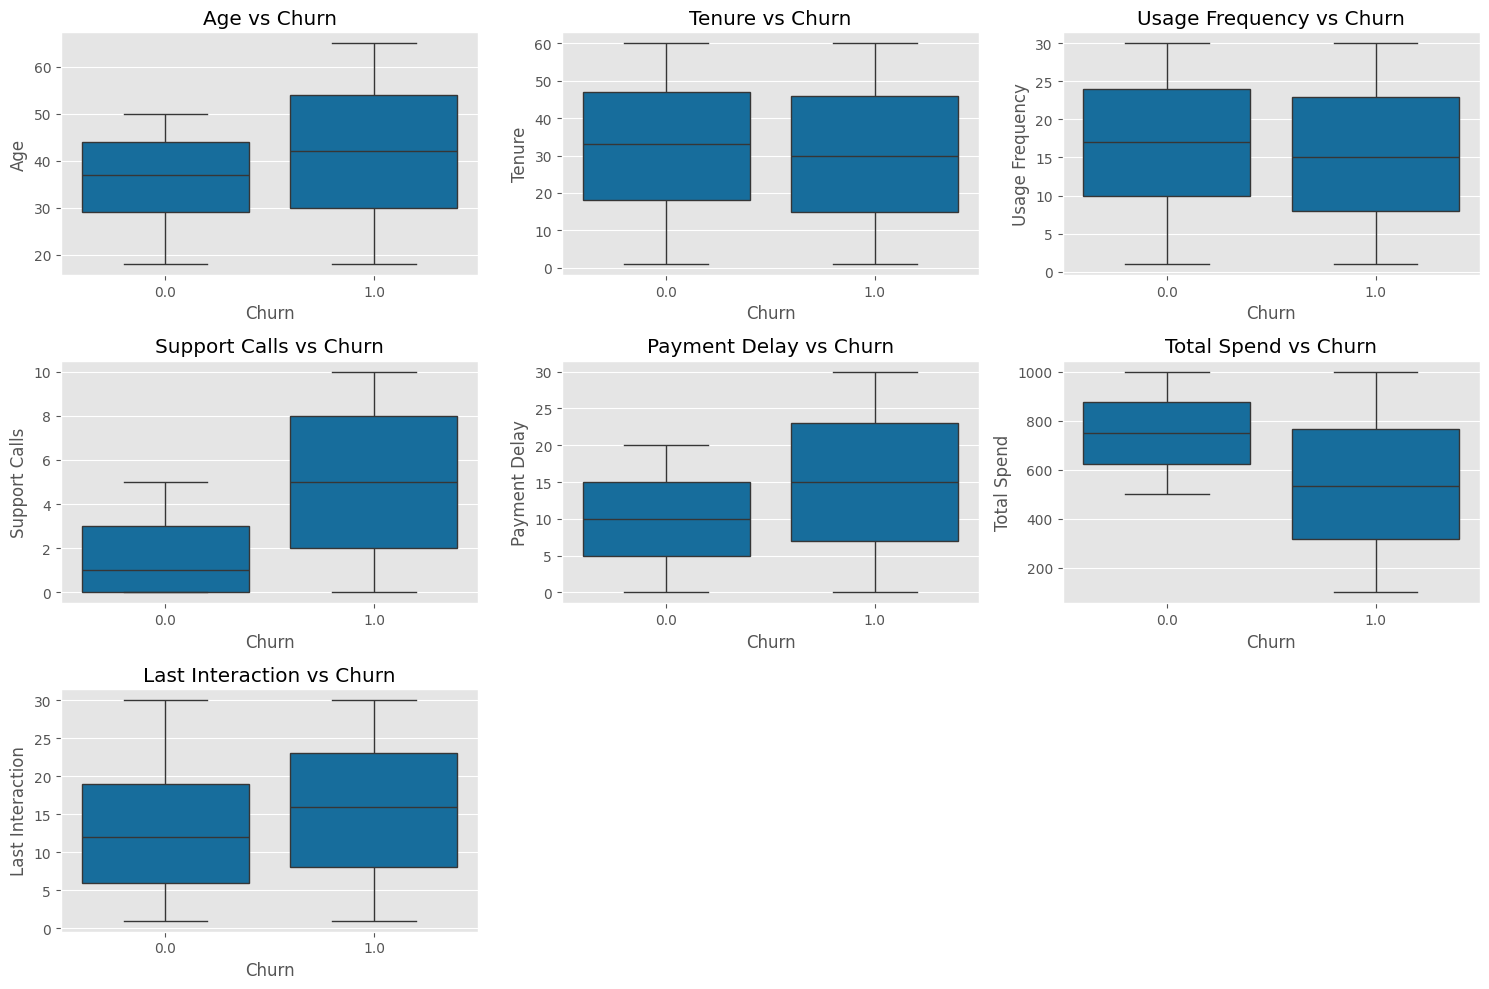

In [24]:
# Relationship between numerical features and churn
plt.figure(figsize=(15, 10))
for i, feature in enumerate([col for col in numerical_features if col not in ['Churn', 'CustomerID']]):
    plt.subplot(3, 3, i+1)
    sns.boxplot(x='Churn', y=feature, data=df)
    plt.title(f'{feature} vs Churn')
plt.tight_layout()
plt.savefig('../notebooks/numerical_vs_churn.png')
plt.show()

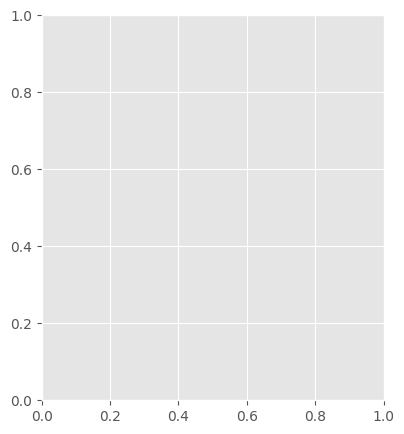

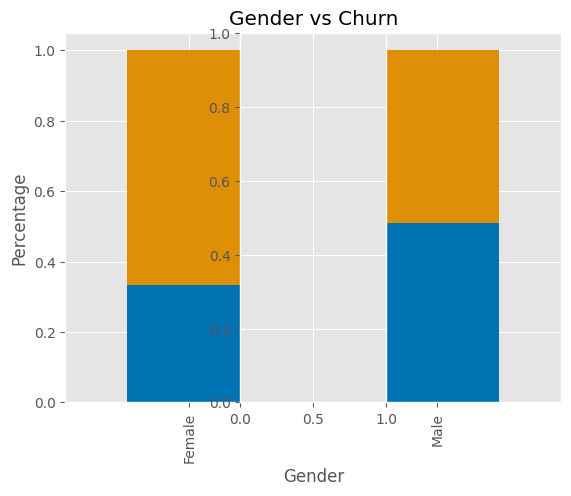

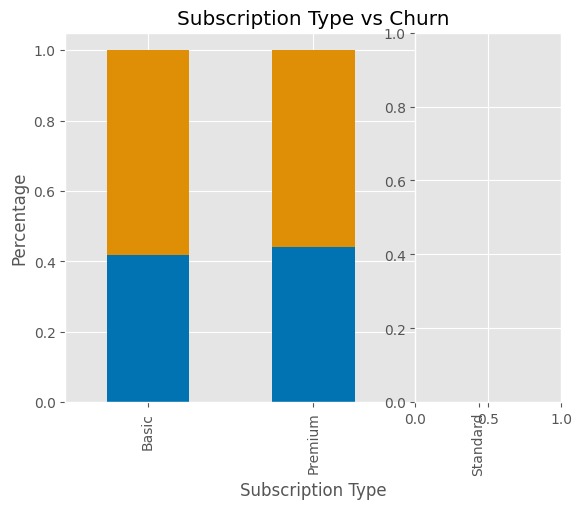

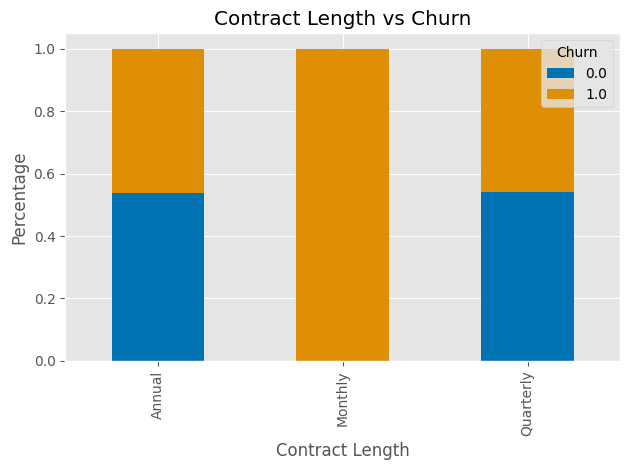

In [25]:
# Relationship between categorical features and churn
plt.figure(figsize=(15, 5))
for i, feature in enumerate(categorical_features):
    plt.subplot(1, 3, i+1)
    df_temp = pd.crosstab(df[feature], df['Churn'])
    df_temp_pct = df_temp.div(df_temp.sum(1), axis=0)
    df_temp_pct.plot(kind='bar', stacked=True)
    plt.title(f'{feature} vs Churn')
    plt.ylabel('Percentage')
plt.tight_layout()
plt.savefig('../notebooks/categorical_vs_churn.png')
plt.show()

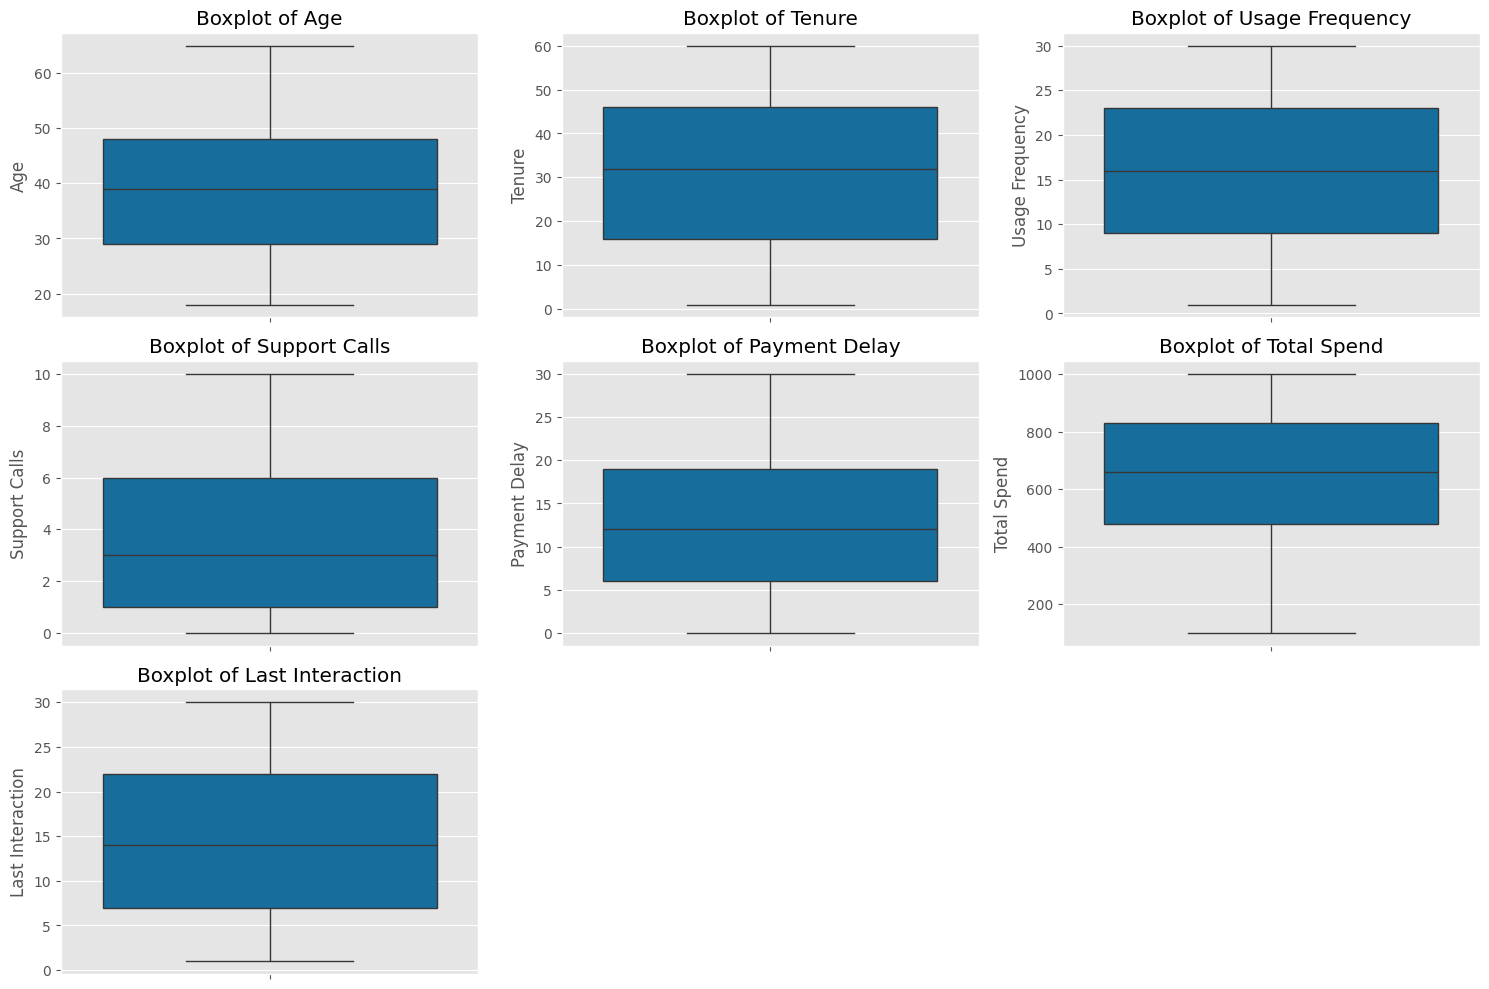

In [27]:
# Check for outliers in numerical features
plt.figure(figsize=(15, 10))
for i, feature in enumerate([col for col in numerical_features if col not in ['Churn', 'CustomerID']]):
    plt.subplot(3, 3, i+1)
    sns.boxplot(y=df[feature])
    plt.title(f'Boxplot of {feature}')
plt.tight_layout()
plt.savefig('../notebooks/outlier_detection.png')
plt.show()